# Welcome to Numpy!

Numpy is a numerical computing library in Python.  It provides $n$ dimensional arrays, several useful array generation methods, linear algebra techniques, and much more.  It is a cornerstone in the Python scientific computing ecosystem.

Today we'll cover a range of methods that Numpy provides, and even do some exploratory data analysis.  Some of the topics we'll cover include:  
* array creation methods
* array selection and manipulation
* methods from `numpy.linalg`
* bit of matplotlib

In [191]:
import numpy as np # common abbreviation
import matplotlib.pyplot as plt # common abbreviation

#   Tells matplotlib to use the inline backend, which allows plots to be
#   rendered in the notebook.
%matplotlib inline

#   Sets up some matplotlib parameters telling it to set a larger figure size
plt.rcParams['figure.figsize'] = (15, 9)

## The `ndarray`

The main object in NumPy is the `ndarray`.  It is a table of elements, usually numbers, but can be arbitrary objects of the same type.  The array is indexed by a tuple.

In [148]:
a = np.arange(12).reshape((2,6))
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

The shape of the array as an $n$-dimensional tuple

In [152]:
a.shape

(2, 6)

The number of dimensions of the array.

In [153]:
a.ndim

2

The datatype of the elements of the array

In [154]:
a.dtype

dtype('int64')

In [155]:
b = a.astype('float32')
b.dtype

dtype('float32')

## Array Creation

Often times one would like to create different types of matrices rather than generating everything by hand.  NumPy provides several ways of creating arrays, including creating them from python lists, linearly spaced ranges, and creating random matrices of arbitrary sizes.

Creating an array from Python lists

In [157]:
a = np.array([[1, 2, 3, 4]]*4)
a

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

Note that when creating arrays with `np.array`, it takes sequences as objects rather then sequences unpacked.

In [159]:
np.array([0.1, 0.2, 0.3])

array([ 0.1,  0.2,  0.3])

In [160]:
np.array(0.1, 0.2, 0.3)

ValueError: only 2 non-keyword arguments accepted

#### Linearly Spaced Sequences

Note that the bounds are inclusive.

In [163]:
#   Linear Spacing from 0, 10.  21 elements
np.linspace(0, 10, 21)

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ])

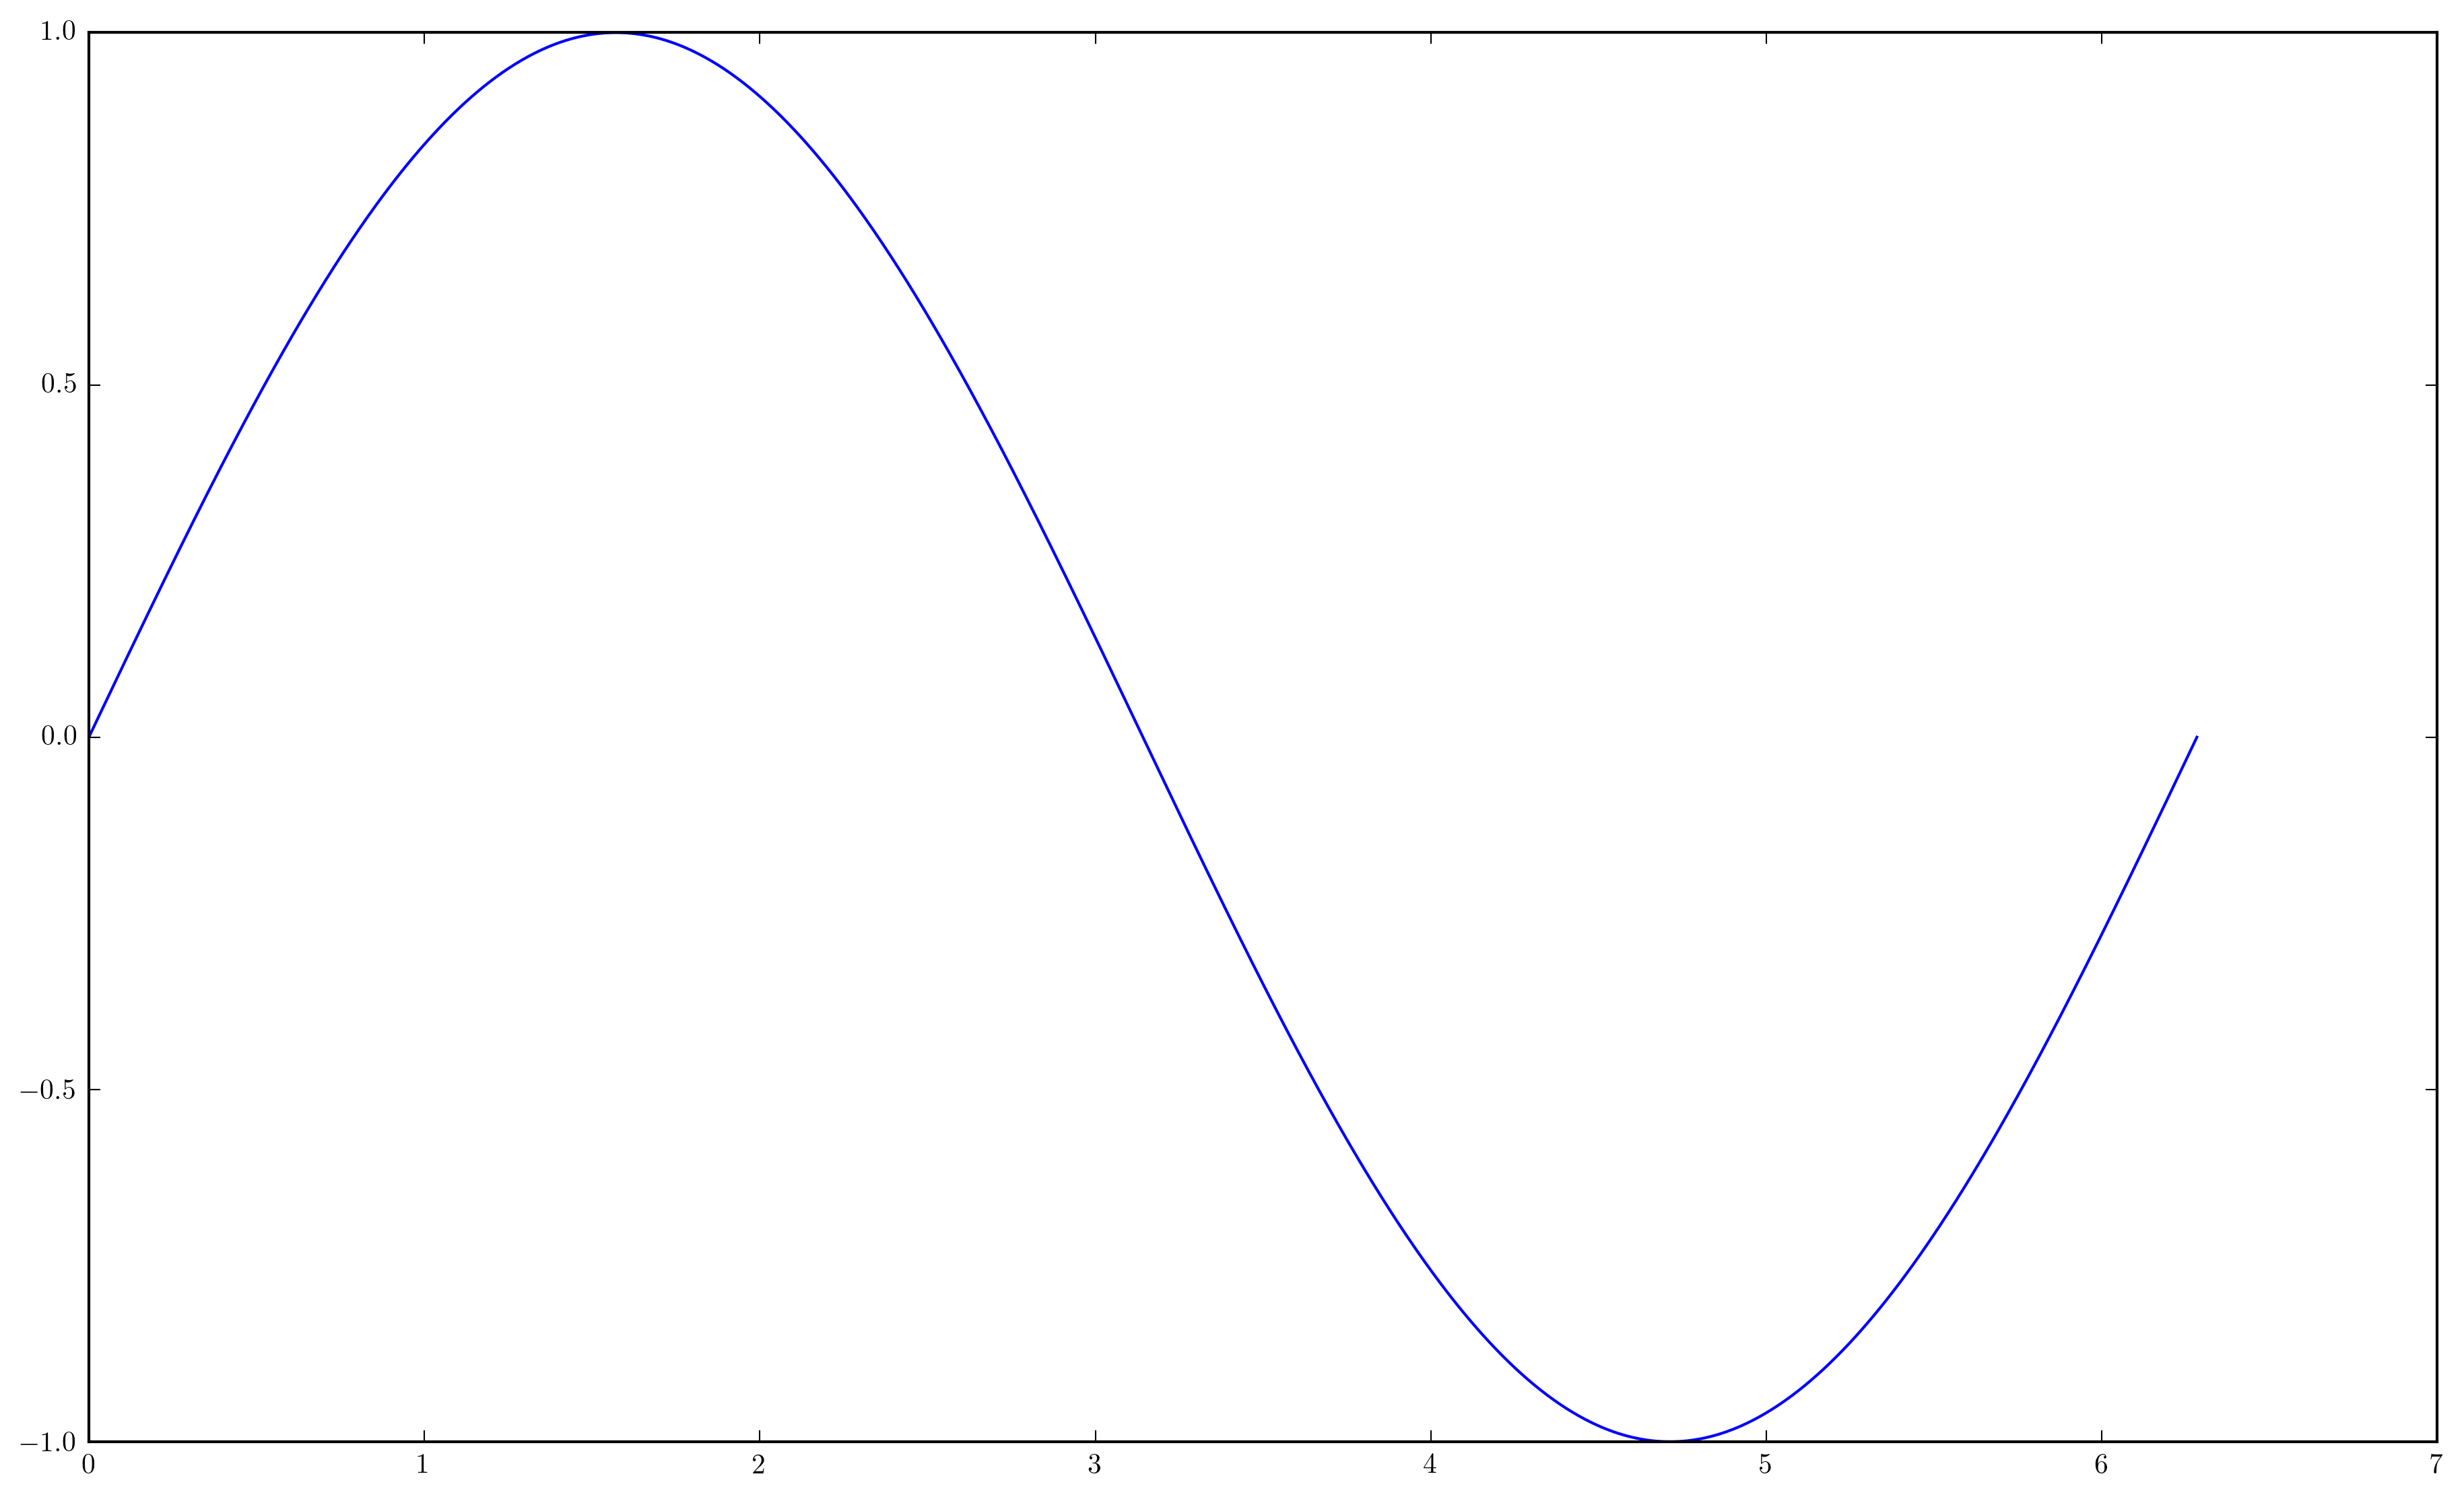

In [146]:
#   An example of a linearly spaced range that provides a whole period of a sinusoid
#   Method signature:
#       np.linspace(start, end, # of steps to take)
x = np.linspace(0, 2 * np.pi, 1000)

#   Applies sin elementwise across x, returning a new array
y = np.sin(x)
plt.plot(x, y)
plt.show()

Note that the start and end bounds are inclusive:

In [17]:
print("Bounds: [{}, {:1.0f}pi]".format(np.min(x), np.max(x)/np.pi))

Bounds: [0.0, 2pi]


In [18]:
def describe_matrix(matrix, name):
    """
    Prints out some nice information regarding the matrix.
    """
    
    print('{} shape: {}\n'.format(name, matrix.shape))
    print('{}:\n{}'.format(name, matrix))

Other useful array creations:

In [19]:
#   Random matrix of arbitrary shape:
random_matrix = np.random.rand(2, 3)
describe_matrix(random_matrix, 'random_matrix')

random_matrix shape: (2, 3)

random_matrix:
[[ 0.65358959  0.11500694  0.95028286]
 [ 0.4821914   0.87247454  0.21233268]]


In [20]:
#   Matrix of all ones
ones = np.ones((4, 6))
describe_matrix(ones, 'ones')

ones shape: (4, 6)

ones:
[[ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]]


In [21]:
#   Matrix of all zeros
zeros = np.zeros((5,7))
describe_matrix(zeros, 'zeros')

zeros shape: (5, 7)

zeros:
[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]


In [164]:
#   Ranges and Diagonals

#   Steps from 0, 20 by 4.
#   Bounds here are [inclusive, exclusive)
a_range = np.arange(0, 20, 4)
diagonal_matrix = np.diag(a_range)
describe_matrix(diagonal_matrix, 'diagonal_matrix')

diagonal_matrix shape: (5, 5)

diagonal_matrix:
[[ 0  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 16]]


#### Vector Stacking

Create higher rank arrays from a sequence of lower rank arrays

In [187]:
a = np.arange(0, 20, 4)
b = np.arange(5)

print(a)
print(b)

[ 0  4  8 12 16]
[0 1 2 3 4]


In [188]:
np.vstack([b, a])

array([[ 0,  1,  2,  3,  4],
       [ 0,  4,  8, 12, 16]])

In [189]:
np.hstack([b, a])

array([ 0,  1,  2,  3,  4,  0,  4,  8, 12, 16])

## Basic Operations with Arrays

The `ndarray` allows you to perform arithmetic operations with it, in a natural way just like you'd write it out.

In [172]:
a = np.arange(10)
b = np.ones(10)

#   Elementwise subtraction
a - b

array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])

In [179]:
#   Scaling a vector
10 * b

array([ 10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.])

Applying a boolean operator to an ndarray also performs it elementwise, resulting in a boolean array

In [182]:
a > 5

array([False, False, False, False, False, False,  True,  True,  True,  True], dtype=bool)

In [173]:
#   Elementwise squaring of the vector
a ** 2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

Note that `*` provides element-wise multiplication rather than a Matrix-Vector product.

In [177]:
#   b is all ones
print(b * a)
print(np.allclose(b * a, a))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
True


In [178]:
#   dot product
print(a.dot(b))
print(a.dot(b) == a.sum())

45.0
True


## Selection and Manipulation

You can index, slice, and iterate over each dimension in an ndarray.  

In [193]:
a = np.arange(9)**2
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64])

In [195]:
a[3] # 3^2

9

In [197]:
#   Get the first through the fifth element
a[0:5]

array([ 0,  1,  4,  9, 16])

Gets every other element from the array.  Note that this is equivalent to `a[0:len(a):2]`.

In [202]:
a[::2]

array([ 0,  4, 16,  0, 64])

You can also set values after slicing an array.  Set every $3^{rd}$ element to 0:

In [204]:
a[::3] = 0
a

array([ 0,  1,  4,  0, 16, 25,  0, 49, 64])

#### Multi-Dimensional selection

For $n$-dimensional arrays, you can take an index or slice from each dimension.

In [209]:
a = np.arange(24).reshape((2, 3, 4))
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [210]:
a[0, :, :]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [211]:
a[0, :2, 1:3]

array([[1, 2],
       [5, 6]])

#### Boolean Indexing

You can also use boolean arrays to index whole `ndarrays` use them along a certain axis.

In [212]:
idx = np.array([True, False, False, True])
a[:, :, idx]

array([[[ 0,  3],
        [ 4,  7],
        [ 8, 11]],

       [[12, 15],
        [16, 19],
        [20, 23]]])

In [215]:
idx = a % 2 == 0   # True for even elements, False for odd

#   Same shape as a
idx.shape

(2, 3, 4)

In [216]:
#   All elements where idx == True
a[idx]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22])

## Linear Algebra

There's also a slew of useful linear algebra techniques, from matrix and vector multiplication to eigensolving.

In [132]:
a = np.array([[1.0, 2.0], [3.0, 4.0]])
a

array([[ 1.,  2.],
       [ 3.,  4.]])

In [133]:
#   Transpose of a matrix
a.transpose()

array([[ 1.,  3.],
       [ 2.,  4.]])

In [134]:
#   Or also
a.T

array([[ 1.,  3.],
       [ 2.,  4.]])

In [136]:
#   When applied to n-dimensional data:
b = np.arange(24).reshape((2, 3, 4))
print(b.shape)
print(b.T.shape)

(2, 3, 4)
(4, 3, 2)


In [137]:
#   Inverse
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [138]:
#   Identity of rank n
u = np.eye(2) # unit 2x2 matrix; "eye" represents "I"
u

array([[ 1.,  0.],
       [ 0.,  1.]])

In [139]:
j = np.array([[0.0, -1.0], [1.0, 0.0]])
np.dot (j, j) # matrix product

array([[-1.,  0.],
       [ 0., -1.]])

In [140]:
np.trace(u)  # trace

2.0

In [141]:
y = np.array([[5.], [7.]])
np.linalg.solve(a, y)

array([[-3.],
       [ 4.]])

In [167]:
#   Eigenvectors and eigenvalues
eigval, eigvec = np.linalg.eig(j)

We have the $i^{th}$ eigenvalue in `eigval[i]` and the $i^{th}$ eigenvector in `eigvec[:, i]`.

In [168]:
#   Check that we actually have eigenpairs
np.allclose(j.dot(eigvec.T[0]), eigvec.T[0] * eigval[0])

True

## matplotlib

###  basic line plot

In [183]:
def generate_random_vector(vector):
    """
    Takes the values and vector and adds a random value to each element
    taken from the distribution N(vector_i, vector_i), so that we have
    a higher variance for larger 
    """
    
    return np.random.normal(vector, vector)

In [184]:
random_array = np.vstack([generate_random_vector(np.arange(100)) for i in range(1000)])

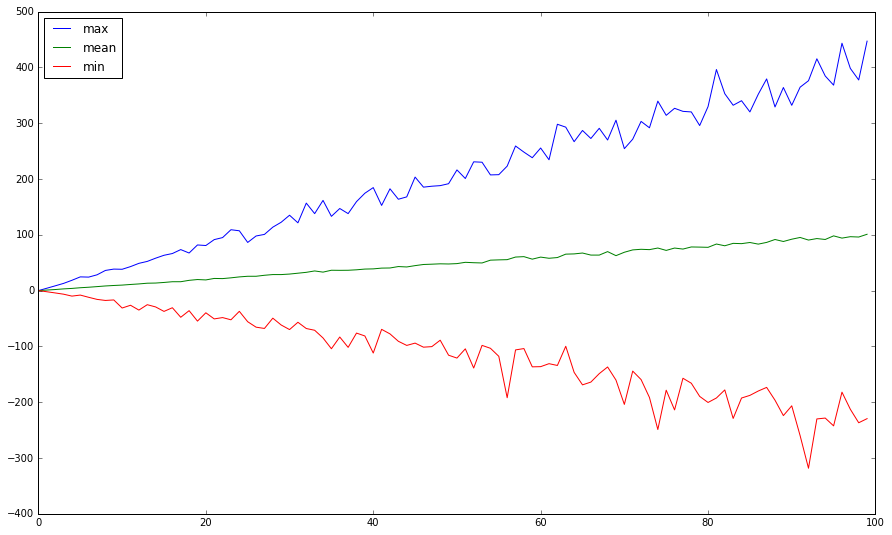

In [217]:
plt.plot(np.arange(100), np.max(random_array, axis=0), label="max")
plt.plot(np.arange(100), np.mean(random_array, axis=0), label="mean")
plt.plot(np.arange(100), np.min(random_array, axis=0), label="min")

plt.legend(loc = 'upper left')

plt.show()

### putting it all together + matplotlib

In [26]:
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()

dict_keys(['target', 'DESCR', 'data', 'target_names', 'feature_names'])

In [219]:
iris['data'].shape

(150, 4)

In [220]:
#   Labels for the data
print(iris['target'].shape)
iris['target']

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [221]:
#   Using the labels as an index for the target names, printed below
labels = np.array(iris['target_names'])[iris['target']]
labels[::50]

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [222]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

We have 4 Dimensions, let's plot 4 3D Plots.

In [232]:
#   4 boolean index arrays to get the 4 combinations of our 3 features
index = np.array([1, 1, 1, 0]).astype(bool)
index_array = np.array([np.roll(index, shift) for shift in range(4)])

#   Get the 4 plots as a list
plot_arrays = [iris['data'][:, index_row].T for index_row in index_array]
print('{}, {}'.format(len(plot_arrays), plot_arrays[0].shape))

4, (3, 150)


In [85]:
plot_features = [np.array(iris['feature_names'])[index_row] for index_row in index_array]
plot_features

[array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'],
       dtype='<U17'),
 array(['sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
       dtype='<U17'),
 array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
       dtype='<U17'),
 array(['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)'],
       dtype='<U17')]

In [107]:
colors = ['r', 'g', 'b']
colormap = dict(zip(np.unique(labels), colors))
color_labels = list(map(lambda key: colormap[key], labels))

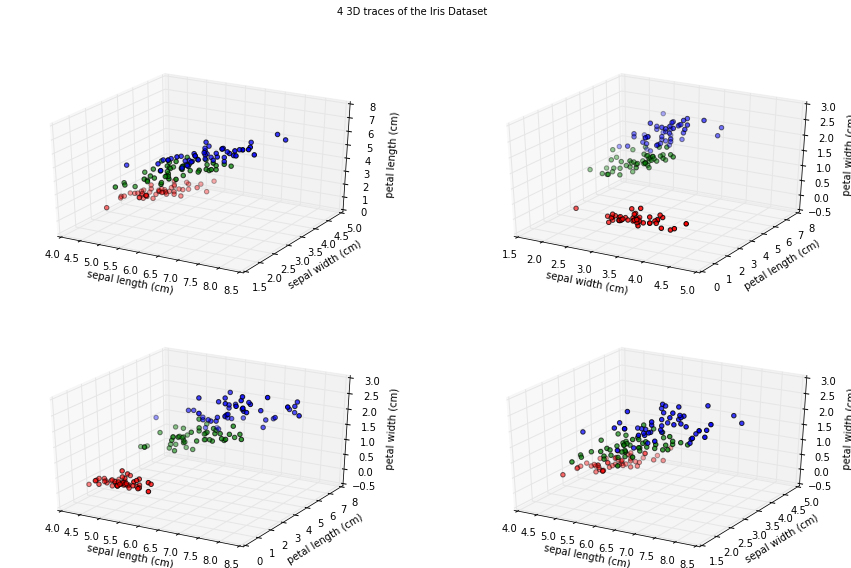

In [243]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec import GridSpec

fig = plt.figure()
gs = GridSpec(2,2)

for ind, data, feature_labels in zip(range(4), plot_arrays, plot_features):
    ax = fig.add_subplot(gs[ind // 2, ind % 2], projection = '3d')
    ax.scatter(*tuple(data), c=color_labels)
    
    label_funcs = [ax.set_xlabel, ax.set_ylabel, ax.set_zlabel]
    for label_func, label in zip(label_funcs, feature_labels):
        label_func(label)
        
fig.suptitle('4 3D traces of the Iris Dataset')
plt.show()